In [30]:
#import lib to connect to reddit
import praw

In [37]:
import os
#print(os.path.abspath(os.curdir))
place = os.chdir("..")
#print(os.path.abspath(place))

In [33]:
import re
import numpy as np
keyVars = [''] * 5
key_doc_name = os.path.abspath(place)+'\keys.txt'
with open(key_doc_name) as keys_doc:
    for n , key in enumerate(keys_doc.readlines()):
            keyVars[n] = key.rstrip().split("'")[1]

In [34]:
#set up reddit connection
reddit = praw.Reddit(client_id=keyVars[0], client_secret=keyVars[1], password=keyVars[2],
                     user_agent=keyVars[3], username=keyVars[4])

In [36]:
#make sure connection is sound
#print(reddit.user.me())

In [5]:
#show how to get different comment properties
for submission in reddit.subreddit('mbti').hot(limit=3):
    if (submission.comments[0].author_flair_text != None):
        print(submission.comments[0].author.name)
        print(submission.comments[0].author_flair_text)
        print(submission.title)
        print(submission.comments[0].body)
        print('\n_______________________________________________\n')

I-ate-your-pony
INTP
How do you feel around ENTPS
Why all those threads about ENTPs? How much validation do you *really* need?

_______________________________________________

goodthankyou
INFJ
Your MBTI type and how much you got in trouble when you were younger
INFJ-no trouble at all. i was a good girl.

_______________________________________________



In [6]:
#show how to get the other comments of a user
user = reddit.redditor('Shadow_Of_')
for comment in user.comments.new():
    #print(submission.title)
    print(comment.body)

"Aluminum" Ok wow whoever made this is a huge fo4 nerd
That's like taking a pic of your computers hard drive and putting it on your computer.
Never watched one
**NSFL WARNING**

[Disgusting porn where the girls mouths are pussies](/spoiler)
Who downvoted this post? 🤔🤔
[HOOT!](https://wiki.teamfortress.com/w/images/d/d8/Sniper_item_birdhead_uber01.wav)
>Hentai

"I like wimmin, even when drawn"
Isle a' dogs
Normie
I know you're very smart 
Heavies are usually easy targets for me; I dominate them regularly. That means I'm not moaning about losing as spy I'm just stating factual information.
[Well, off to visit your Mother](https://wiki.teamfortress.com/w/images/2/2b/Spy_DominationScout01.wav)
Wish I was as gangster as you
>Without dealing with 3rd party programs

Yeah, Xx_Haxor_Xx speed hacking and wall hacking is a very vanilla experience.
When you put all your stats in "language" and leave everything else at zero.
Gotta cross that border
> Precocious

Me
Here is the 10th rule of word ma

examples used to pull more than the limit of 1000 posts from a subreddit
https://stackoverflow.com/questions/42658676/getting-more-than-100-search-results-with-praw

In [3]:
import datetime
import pandas as pd
import numpy as np
import prawcore

#initialize vars
mbti_text_collection = pd.DataFrame({'Name':[],'mbti':[],'text':[],'text_count':[]}).set_index('Name')
number_count = 0
total_viewed = 0

params = {'sort':'new', 'limit':None, 'syntax':'cloudsearch'}
time_now = datetime.datetime.now()
last_time = time_now.timestamp()
next_time = (time_now - datetime.timedelta(days=365)).timestamp()
post_count = 0
rep=0

try:
    while True:
        rep+=1
        print('____________________________________________________________')
        print('rep: ',rep)
        for submission in reddit.subreddit('mbti').search('timestamp:{0}..{1}'.format(
            int(next_time),
            int(last_time)),
            **params):

            #loop through all comments in the 'mbti' subreddit
            #if the post chain is longer than 0 include
            if len(submission.comments)>0:
                #update the total number of posts viewed
                total_viewed +=1
                #for each post chain cycle through all comments/responses
                for statement in submission.comments:
                    #if the flair text is not '', ie it equals 'INTJ' ext.
                    try:
                        if (statement.author_flair_text != None):
                            #update the number of posts with flair
                            number_count+=1

                            #get all properties of the post
                            reddit_user = statement.author.name
                            user_mbti = statement.author_flair_text
                            user = reddit.redditor(reddit_user)
                            #check to see if the users post have already been collected from anoth post
                            try:
                                if not np.isin(reddit_user,mbti_text_collection.index.values):
                                    #find all the other posts by that author
                                    for count, comment in enumerate(user.comments.new()):
                                        if count<50:
                                            #if this is the first author then append quote info
                                            if (len(mbti_text_collection)==0):
                                                text_body = comment.body.replace('\n', ' ').replace('\r', '').replace('\"', "\'")
                                                new = pd.DataFrame({'Name':[reddit_user],'mbti':[user_mbti],'text':[text_body],'text_count':[1]}).set_index('Name')
                                                mbti_text_collection = mbti_text_collection.append(new)
                                            #if mbti_text_collection is not empty then add to list
                                            else:
                                                #if the reddit user exists then append the string to that users corpus of text
                                                if np.isin(reddit_user,mbti_text_collection.index.values):
                                                    text_body = comment.body.replace('\n', ' ').replace('\r', '').replace('\"', "\'")
                                                    mbti_text_collection.text[reddit_user] = mbti_text_collection.text[reddit_user] + ' ||| ' + text_body
                                                    mbti_text_collection.text_count[reddit_user] += 1
                                                #if the reddit user does not exist then create a new row for that user
                                                else:
                                                    text_body = comment.body.replace('\n', ' ').replace('\r', '').replace('\"', "\'")
                                                    new = pd.DataFrame({'Name':[reddit_user],'mbti':[user_mbti] \
                                                                        ,'text':[text_body + ' ||| '],'text_count':[1]}).set_index('Name')
                                                    mbti_text_collection = mbti_text_collection.append(new)
                                    #print a status update so that the progress is visible
                                    time = submission.created
                                    post_time = datetime.datetime.fromtimestamp(time)
                                    print(post_time, ': ', len(mbti_text_collection),': ',user)
                                    #print(number_count, ' : ', total_viewed)
                            except:
                                print(reddit_user, "object has no attribute 'author_flair_text'")
                    except prawcore.exceptions.Forbidden:
                        print('user: ',user, '- caused a forbidden error when accessing other posts')
                    except AttributeError:
                        print('user: ',user, '-attribute error')
            #what is a submission if its length is 0?
        next_time = (post_time- datetime.timedelta(days=360)).timestamp()
        last_time = time
except KeyboardInterrupt:
    print('exitted with ctrl-C')

____________________________________________________________
rep:  1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2018-03-27 12:42:25 :  1 :  NonpsychoactiveLeg
2018-03-27 12:42:25 :  2 :  Tekuila87
2018-03-27 10:19:07 :  3 :  Sazzzzzzzzzzz
2018-03-27 10:19:07 :  4 :  Frandicterus
2018-03-27 10:19:07 :  5 :  sliskenswe
2018-03-27 08:19:12 :  6 :  leavingNYCforwhere
2018-03-27 08:19:12 :  7 :  Metal_Fish
2018-03-27 06:18:10 :  8 :  MrMoodle
2018-03-27 02:48:42 :  9 :  blackalyph
2018-03-27 02:20:47 :  10 :  Kalinali
2018-03-27 02:20:47 :  11 :  VAOTOMARNOCU
2018-03-27 02:19:37 :  12 :  Sunstream
2018-03-27 02:19:37 :  13 :  canwespeakinflowers
2018-03-27 02:19:37 :  14 :  MBTI-Guy
2018-03-27 02:19:37 :  15 :  sweetsleeper
2018-03-27 02:19:37 :  16 :  VenganceNeos1
2018-03-26 22:21:40 :  17 :  SemperJ550
2018-03-26 22:21:40 :  18 :  Lolrly123
2018-03-26 22:21:40 :  19 :  rvi857
2018-03-26 22:21:40 :  20 :  CycloneLight
2018-03-26 22:21:40 :  21 :  work-a-day_schlub
2018-03-26 22:21:40 :  22 :  yanzae
2018-03-26 22:21:40 :  23 :  FearTigerleap
2018-03-26 20:40:48 :  24 :  Shadow_Of_
2018-03-26 20:40:

In [64]:
print(mbti_text_collection)

                      mbti                                               text  \
Name                                                                            
Sazzzzzzzzzzz         ISTP  Not much difference between ISTJ and ISFJ, but...   
VampirePlays          INTJ  Its not something to "know", its an argument t...   
RainaaaGrace          ESTJ  I think the Corporate is just trying to figure...   
AAL314                INTJ   > The theory is that conflictors get along qu...   
FunEquivalent         ISFP  i'm 22. \n\nAnd i don't see how my post is "we...   
AGfox17               INTP  Thanks for demonstrating why I don't get along...   
luckyhit707           ESFJ  I get along pretty well with ISTJs on a cordia...   
Burning_Lovers        ESFP  you don't know the half of it\n\ncomplaining a...   
rvi857                ENFP  ISTJs for me are the worst.  |||  ||| * ENTP -...   
IveeLaChatte          ENFP  I didn’t realize there were so few N’s.\n\nI’m...   
cookedfeces           ISFP  

In [50]:
#show the collected data for verification of collection
print(mbti_text_collection)

                      mbti                                               text  \
Name                                                                            
Sazzzzzzzzzzz         ISTP  Not much difference between ISTJ and ISFJ, but...   
VampirePlays          INTJ  Its not something to "know", its an argument t...   
RainaaaGrace          ESTJ  I think the Corporate is just trying to figure...   
AAL314                INTJ   > The theory is that conflictors get along qu...   
FunEquivalent         ISFP  i'm 22. \n\nAnd i don't see how my post is "we...   
AGfox17               INTP  Thanks for demonstrating why I don't get along...   
luckyhit707           ESFJ  I get along pretty well with ISTJs on a cordia...   
Burning_Lovers        ESFP  you don't know the half of it\n\ncomplaining a...   
rvi857                ENFP  ISTJs for me are the worst.  |||  ||| * ENTP -...   
IveeLaChatte          ENFP  I didn’t realize there were so few N’s.\n\nI’m...   
cookedfeces           ISFP  

In [5]:
#show info/length of collected data
print(mbti_text_collection.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3034 entries, NonpsychoactiveLeg to Raze183
Data columns (total 3 columns):
mbti          3034 non-null object
text          3034 non-null object
text_count    3034 non-null float64
dtypes: float64(1), object(2)
memory usage: 174.8+ KB
None


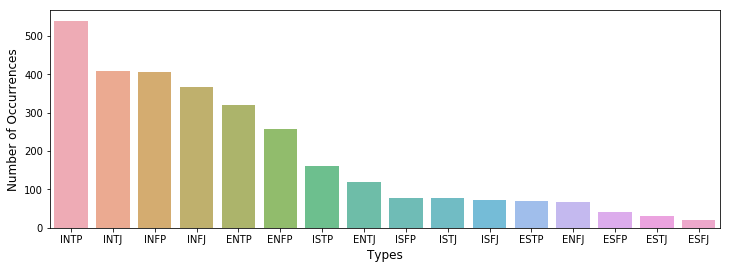

In [6]:
#check distribution of all the collected types
import matplotlib.pyplot as plt
import seaborn as sns
cnt_srs = mbti_text_collection['mbti'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

In [4]:
#save data to a csv file
mbti_text_collection.to_csv('Reddit_mbti_data_2.csv',encoding='utf-8')

In [44]:
import pandas as pd
import numpy as np
mbti_type_manual_list = ['ESFJ','ESFP','ESTJ']

#initialize vars
mbti_text_collection_filler = pd.DataFrame({'Name':[],'mbti':[],'text':[],'text_count':[]}).set_index('Name')
number_count = 0
total_viewed = 0

for mbti_type in mbti_type_manual_list:
    with open(mbti_type +'_names.txt') as doc: 
        for userName in doc.readlines():
            #print(mbti_type, ': ',userName.rstrip())
            reddit_user = userName.rstrip()
            user = reddit.redditor(reddit_user)
            print(user.comments.new())
            for count, comment in enumerate(user.comments.new()):
                if count<50:
                    #if this is the first author then append quote info
                    if (len(mbti_text_collection_filler)==0):
                        text_body = comment.body.replace('\n', ' ').replace('\r', '').replace('\"', "\'")
                        new = pd.DataFrame({'Name':[reddit_user],'mbti':[mbti_type],'text':[text_body],'text_count':[1]}).set_index('Name')
                        mbti_text_collection_filler = mbti_text_collection_filler.append(new)
                    #if mbti_text_collection is not empty then add to list
                    else:
                        #if the reddit user exists then append the string to that users corpus of text
                        if np.isin(reddit_user,mbti_text_collection_filler.index.values):
                            text_body = comment.body.replace('\n', ' ').replace('\r', '').replace('\"', "\'")
                            mbti_text_collection_filler.text[reddit_user] = mbti_text_collection_filler.text[reddit_user] + ' ||| ' + text_body
                            mbti_text_collection_filler.text_count[reddit_user] += 1
                        #if the reddit user does not exist then create a new row for that user
                        else:
                            text_body = comment.body.replace('\n', ' ').replace('\r', '').replace('\"', "\'")
                            new = pd.DataFrame({'Name':[reddit_user],'mbti':[mbti_type] \
                                                ,'text':[text_body + ' ||| '],'text_count':[1]}).set_index('Name')
                            mbti_text_collection_filler = mbti_text_collection_filler.append(new)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [45]:
print(mbti_text_collection_filler.drop('text', axis=1)[mbti_text_collection_filler.text_count>50])

Empty DataFrame
Columns: [mbti, text_count]
Index: []


In [46]:
print(mbti_text_collection_filler.drop('text', axis=1)[mbti_text_collection_filler.text_count<50])

Empty DataFrame
Columns: [mbti, text_count]
Index: []


In [47]:
#save data to a csv file
mbti_text_collection_filler.to_csv('Reddit_mbti_data_filler.csv',encoding='utf-8')